### I/O

In [14]:
# # read
# img = cv2.imread('hw1_sample_images\sample1.png')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# # save
# img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# cv2.imwrite("result1.png",img)

# # plot
# plt.imshow(img)
# plt.title('sample1.png')
# plt.show()

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

sample1 = cv2.imread('hw1_sample_images\sample1.png')
sample1 = cv2.cvtColor(sample1, cv2.COLOR_BGR2RGB)
sample2 = cv2.imread('hw1_sample_images\sample2.png', cv2.IMREAD_GRAYSCALE)
sample3 = cv2.imread('hw1_sample_images\sample3.png', cv2.IMREAD_GRAYSCALE)
sample4 = cv2.imread('hw1_sample_images\sample4.png', cv2.IMREAD_GRAYSCALE)
sample5 = cv2.imread('hw1_sample_images\sample5.png', cv2.IMREAD_GRAYSCALE)

### Perform horizontal flipping on sample1.png and output the result as result1.png.
https://pinetools.com/flip-image

In [15]:
height, width, channel = sample1.shape
result1 = sample1.copy()
# swap by column
for j in range(width//2):
    result1[:, [j, width-j-1]] = result1[:, [width-j-1, j]]

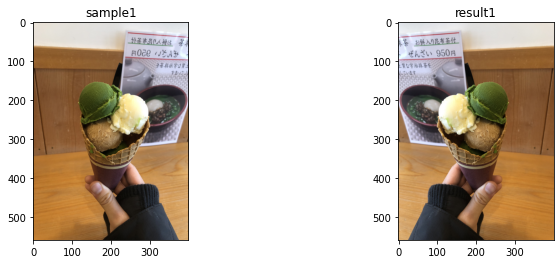

In [16]:
def polt2img(img1, img2, name1, name2, gray=True):
    plt.figure(figsize=(12,4))

    plt.subplot(121)
    if gray:
        plt.imshow(img1, cmap='gray',vmin=0, vmax=255)
    else:
        plt.imshow(img1)
    plt.title(name1)

    plt.subplot(122)
    if gray:
        plt.imshow(img2, cmap='gray',vmin=0, vmax=255)
    else:
        plt.imshow(img2)
    plt.title(name2)

    plt.show()
polt2img(sample1, result1, 'sample1', 'result1', gray=False)

### Please convert result1 to a grayscale image named result2.png.
https://cg2010studio.com/2011/06/06/opencv-%E8%BD%89%E6%8F%9B%E5%BD%B1%E5%83%8F%E7%82%BA%E7%81%B0%E9%9A%8E-transform-image-to-gray-level/

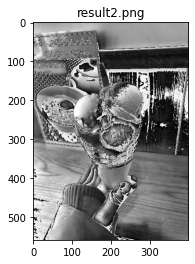

In [17]:
result2 = (result1[:,:,0]+result1[:,:,1]+result1[:,:,2])/3
plt.title('result2.png')
plt.imshow(result2, cmap='gray')

In [18]:
print(result1[:,:,0].sum()) # R
print(result1[:,:,1].sum()) # G
print(result1[:,:,2].sum()) # B

33708325
27337852
20695276


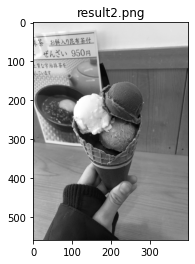

In [19]:
result2 = 0.299*result1[:,:,0]+0.587*result1[:,:,1]+0.114*result1[:,:,2]
plt.title('result2.png')
plt.imshow(result2, cmap='gray')

### Decrease the brightness of sample2 by dividing the intensity values by 2 and output the result as result3.png.

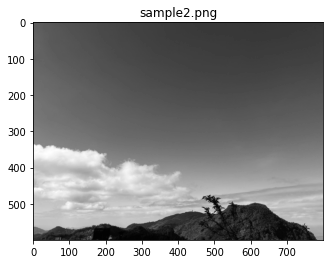

In [20]:
plt.title('sample2.png')
plt.imshow(sample2, cmap='gray')

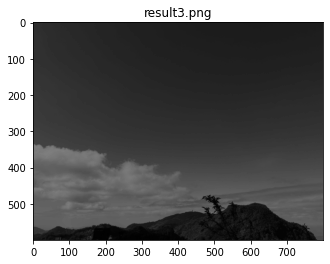

In [21]:
result3 = sample2
result3 = result3/2 
result3 = np.around(result3)
plt.title('result3.png')
plt.imshow(result3, cmap='gray',vmin=0, vmax=255)

### Increase the brightness of result3 by multiplying the intensity values by 3 and output the result as result4.png.

In [22]:
result3[result3 == 0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

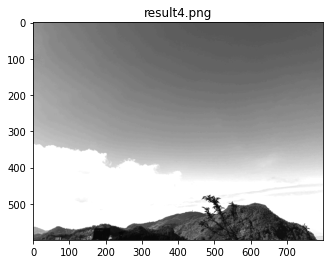

In [23]:
result4 = result3+1 #避免乘到0還是0
result4 = result4*3.0
result4 = np.around(result4)
result4 = np.clip(result4,0,255)
plt.title('result4.png')
plt.imshow(result4, cmap='gray',vmin=0, vmax=255)

### Plot the histograms of sample2, result3 and result4. What can you observe from these three his-tograms?

In [24]:
hist,bins = np.histogram(sample2,bins=256,range=(0,256))
print(hist.shape)
print(bins.shape) #多了一個維度
bins = bins[:-1]
# bins

(256,)
(257,)


In [25]:
def plot_img_histogram(img, title):
    hist,bins = np.histogram(img,bins=256,range=(0,256))
    bins = bins[:-1]
    plt.bar(bins,hist)
    plt.title(title)

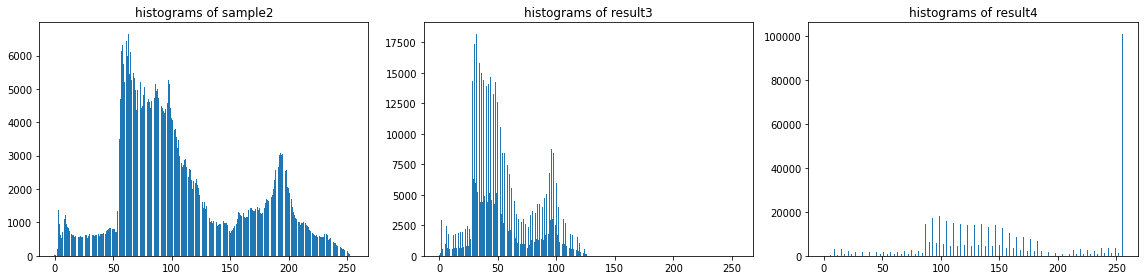

In [26]:
plt.figure(figsize=(16,4))

plt.subplot(131)
plot_img_histogram(sample2, 'histograms of sample2')

plt.subplot(132)
plot_img_histogram(result3, 'histograms of result3')

plt.subplot(133)
plot_img_histogram(result4, 'histograms of result4')

plt.tight_layout()
plt.show()

### Perform global histogram equalization on result3 and result4, and output the results as result5.png and result6.png
https://codeinfo.space/imageprocessing/histogram-equalization/  
經過直方圖均衡化後，可增強圖像的對比度(亮變更亮，暗變更暗)，使得細節更加清晰，色彩也會變得比較均衡。  

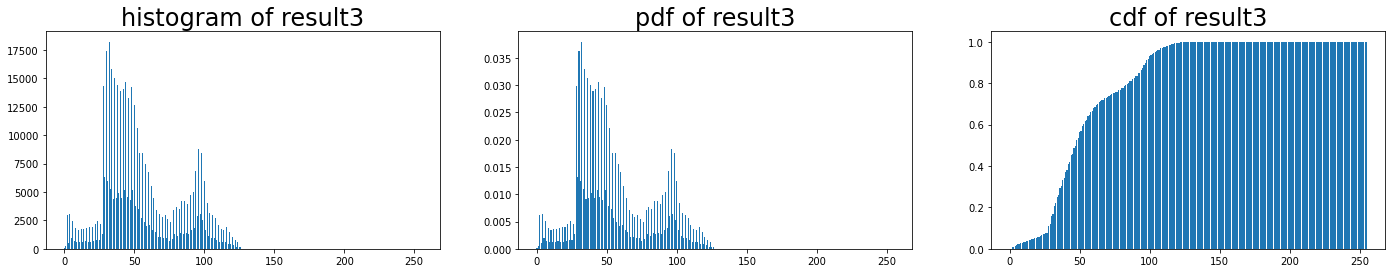

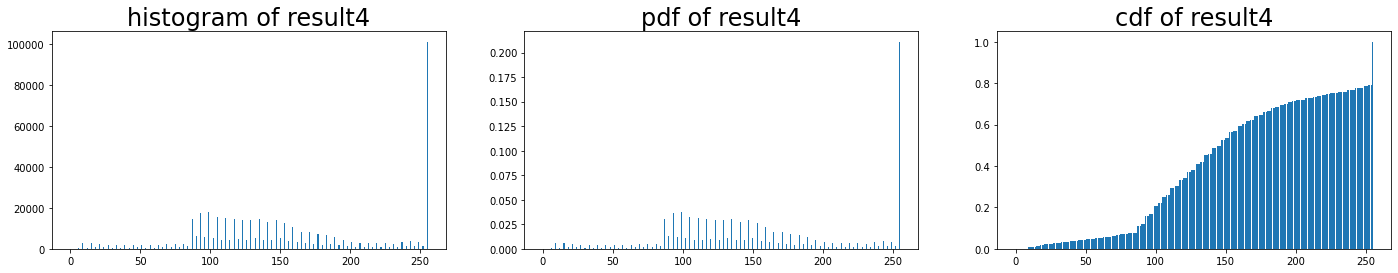

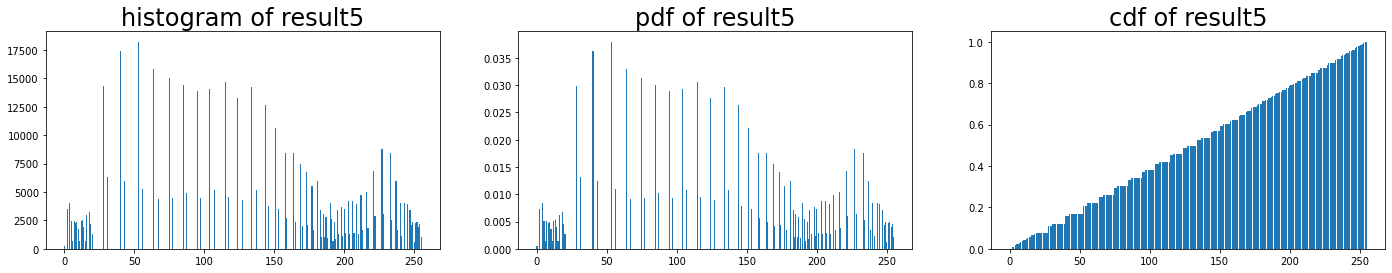

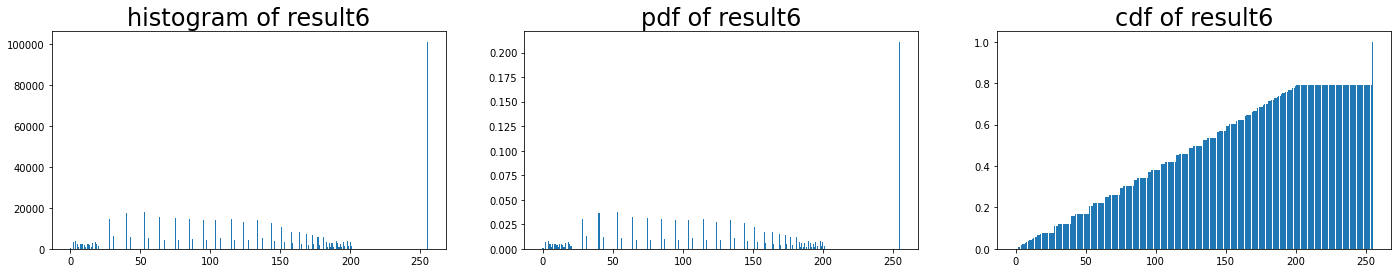

In [27]:
def globalHE(img):
    hist,bins = np.histogram(img.ravel(),256,[0,255])
    pdf = hist/img.size # 出現次數/總像素點 = 機率 = pdf
    cdf = pdf.cumsum() # 將機率利用cumsum()累加 = cdf
    equ_value = np.around(cdf * 255).astype('uint8') #將cdf乘以255(max value) ，再四捨五入取整數
    result = equ_value[img] #將原本的value數值transfer到對應的數值
    return result

def plot_img_cdf_pdf(img, name):
    hist,bins = np.histogram(img,bins=256,range=(0,256))
    pdf = hist/img.size
    cdf = pdf.cumsum() 

    plt.figure(figsize=(24,4)) #圖要設大一點柱狀圖才不會被壓縮變形

    plt.subplot(131)
    plt.bar(bins[:-1],hist)
    plt.title('histogram of {}'.format(name),fontsize=24)

    plt.subplot(132)
    plt.bar(bins[:-1],pdf)
    plt.title('pdf of {}'.format(name),fontsize=24)

    plt.subplot(133)
    plt.bar(bins[:-1],cdf)
    plt.title('cdf of {}'.format(name),fontsize=24)
    
result5 = globalHE(result3.astype('uint8')) 
result6 = globalHE(result4.astype('uint8')) 

plot_img_cdf_pdf(result3, 'result3')
plot_img_cdf_pdf(result4, 'result4')
plot_img_cdf_pdf(result5, 'result5')
plot_img_cdf_pdf(result6, 'result6')

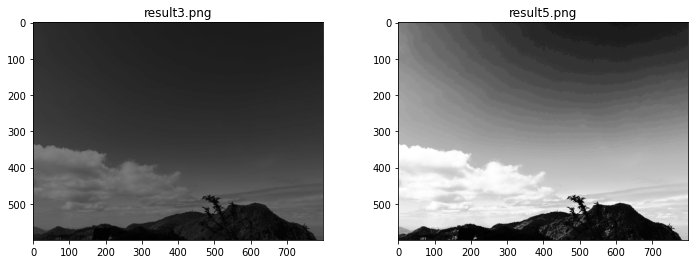

In [28]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(result3, cmap='gray',vmin=0, vmax=255)
plt.title('result3.png')

plt.subplot(122)
plt.imshow(result5, cmap='gray',vmin=0, vmax=255)
plt.title('result5.png')

plt.show()

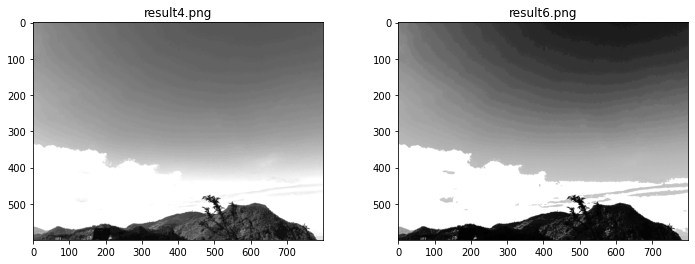

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(result4, cmap='gray',vmin=0, vmax=255)
plt.title('result4.png')

plt.subplot(122)
plt.imshow(result6, cmap='gray',vmin=0, vmax=255)
plt.title('result6.png')

plt.show()

### Perform local histogram equalization on result3 and result4, and output the result as result7.pngand result8.png

start AHE, kernel_size= 200
Total time taken in seconds:  0.01600050926208496


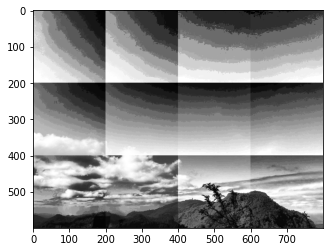

In [30]:
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('result3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def localHE(img, kernel_size):
    print("start AHE, kernel_size=",kernel_size)
    kernel_size_squared = int(kernel_size * kernel_size)
    # Padding
    img = np.lib.pad(image,(kernel_size,kernel_size),'reflect')
    # 設定灰階的最大值
    max_value = 255
    # 開一個新的陣列存 AHE img
    ime_ahe = np.zeros_like(img)
    # start
    t_start = time.time()
    # 遍歷圖片的每個pixels
    for i in range(0,img.shape[0]-kernel_size,kernel_size):
        for j in range(0,img.shape[1]-kernel_size, kernel_size):
            #提取圖片的區塊(kernel_size x kernel_size)
            kernel = img[i:i+kernel_size,j:j+kernel_size]
            # HE
            hist,bins = np.histogram(kernel,256,[0,255])
            pdf = hist/kernel.size 
            cdf = pdf.cumsum() 
            equ_value = np.around(cdf * 255).astype('uint8') 
            
            kernel = equ_value[kernel] 
            ime_ahe[i:i+kernel_size,j:j+kernel_size] = kernel
            
    # end
    t_end = time.time()
    print ('Total time taken in seconds: ',(t_end-t_start))
    # 將之前的padding切掉
    img_sliced = ime_ahe[(0+kernel_size):(img.shape[0]-kernel_size),(0+kernel_size):(img.shape[1]-kernel_size)]
    image_output = np.array(img_sliced, dtype = np.uint8)
    
    return image_output

LHE = localHE(image, 200)   
plt.imshow(LHE, cmap='gray',vmin=0, vmax=255)

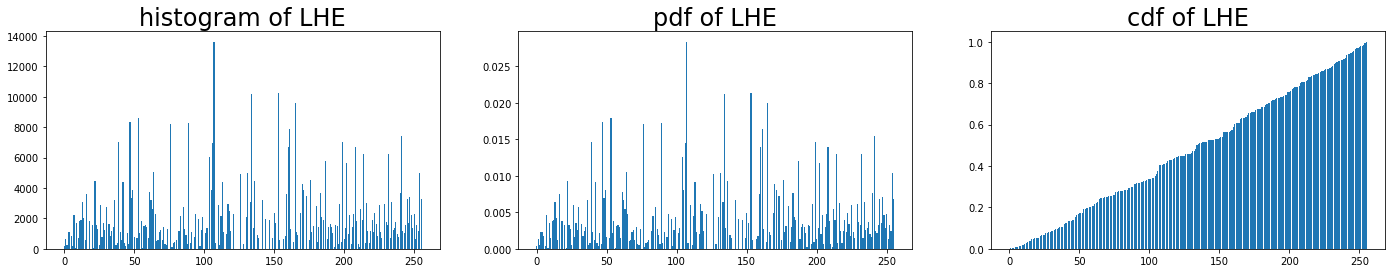

In [31]:
plot_img_cdf_pdf(LHE, 'LHE')

start AHE, kernel_size= 11
622 822
Total time taken in seconds:  57.60402965545654


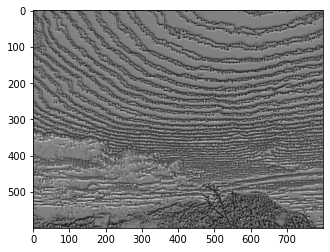

In [32]:
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt

def localHE_2(img, kernel_size):
    print("start AHE, kernel_size=",kernel_size)
    # Padding
    img = np.lib.pad(img, (kernel_size,kernel_size), 'reflect')
    height, width = img.shape
    print(height, width)
    gap = kernel_size//2
    # start
    t_start = time.time()
    # 遍歷圖片的每個pixels
    for i in range(gap, height - gap):
        for j in range(gap, width - gap):
            kernel = img[i-gap:i+gap+1, j-gap:j+gap+1]
            # HE
            hist,bins = np.histogram(kernel,256,[0,255])
            pdf = hist/kernel.size 
            cdf = pdf.cumsum() 
            equ_value = np.around(cdf * 255).astype('uint8')
            p = equ_value[int(img[i,j])]
            img[i,j] = p
            
    # end
    t_end = time.time()
    print ('Total time taken in seconds: ',(t_end-t_start))
    # 將padding切掉
    img = img[kernel_size:height-kernel_size,kernel_size:width-kernel_size]
    
    return img

LHE = localHE_2(result3, 11)   
plt.imshow(LHE, cmap='gray',vmin=0, vmax=255)

In [33]:
def localHE2(img, kernel_size):
    print("start AHE, kernel_size=",kernel_size)
    kernel_size_squared = int(kernel_size * kernel_size)
    # Padding
    img = np.lib.pad(img,(kernel_size,kernel_size),'reflect')
    # 設定灰階的最大值
    max_value = 255
    # 開一個新的陣列存 AHE img
    ime_ahe = np.zeros_like(img)
    # start
    t_start = time.time()
    # 遍歷圖片的每個pixels
    for i in range(0,img.shape[0]-kernel_size):
        for j in range(0,img.shape[1]-kernel_size):
            #提取圖片的區塊(kernel_size x kernel_size)
            kernel = img[i:i+kernel_size,j:j+kernel_size]
            #由小到大排序
            kernel_flat = np.sort(kernel.flatten())
            #找到目前的pixel在這個區塊排第幾名
            rank = np.where(kernel_flat == img[i,j])[0][0] 
            #排第幾名就獲取相對應排名的亮度
            ime_ahe[i,j] = int( max_value * ( rank / kernel_size_squared ) )
            
    # end
    t_end = time.time()
    print ('Total time taken in seconds: ',(t_end-t_start))
    # 將之前的padding切掉
    img_sliced = ime_ahe[(0+kernel_size):(img.shape[0]-kernel_size),(0+kernel_size):(img.shape[1]-kernel_size)]
    image_output = np.array(img_sliced, dtype = np.uint8)
    
    return image_output

In [37]:
result7 = localHE2(result3, 30)  
result8 = localHE2(result4, 30)  

start AHE, kernel_size= 30
Total time taken in seconds:  11.290026187896729
start AHE, kernel_size= 30
Total time taken in seconds:  10.531998872756958


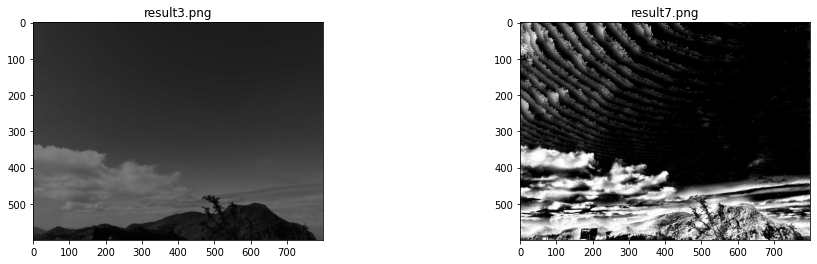

In [38]:
plt.figure(figsize=(16,4))

plt.subplot(121)
plt.imshow(result3, cmap='gray',vmin=0, vmax=255)
plt.title('result3.png')

plt.subplot(122)
plt.imshow(result7, cmap='gray',vmin=0, vmax=255)
plt.title('result7.png')

plt.show()

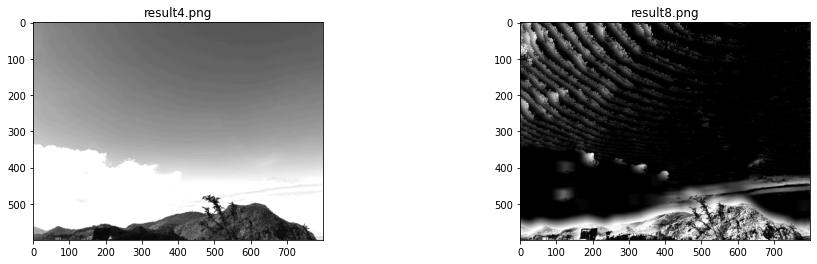

In [39]:
plt.figure(figsize=(16,4))

plt.subplot(121)
plt.imshow(result4, cmap='gray',vmin=0, vmax=255)
plt.title('result4.png')

plt.subplot(122)
plt.imshow(result8, cmap='gray',vmin=0, vmax=255)
plt.title('result8.png')

plt.show()

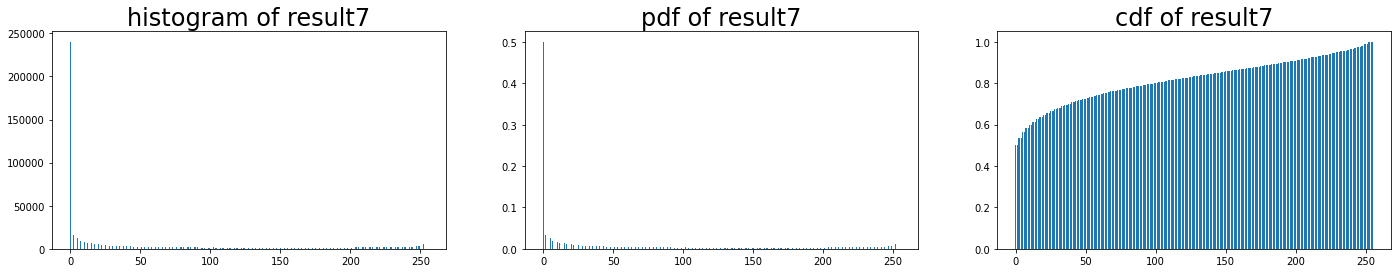

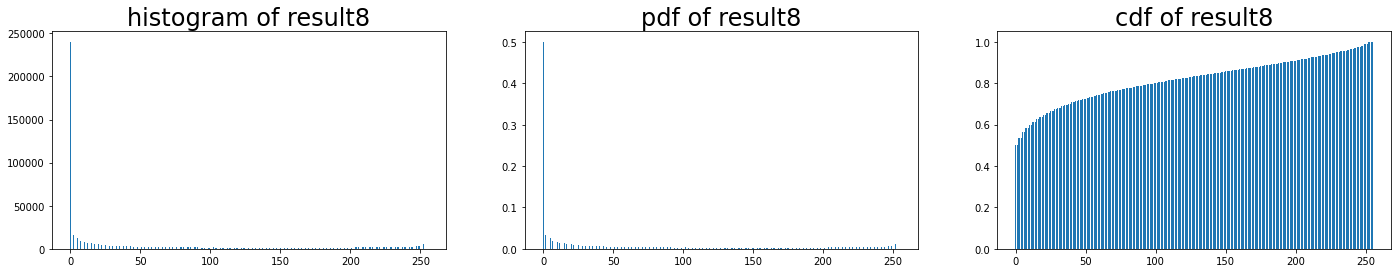

In [58]:
plot_img_cdf_pdf(result7, 'result7')
plot_img_cdf_pdf(result8, 'result8')

## Design a transfer function to enhance sample2 and output the result as result9.png

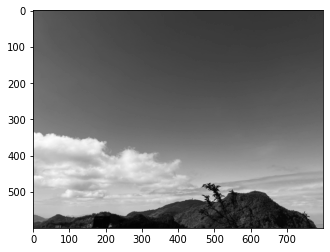

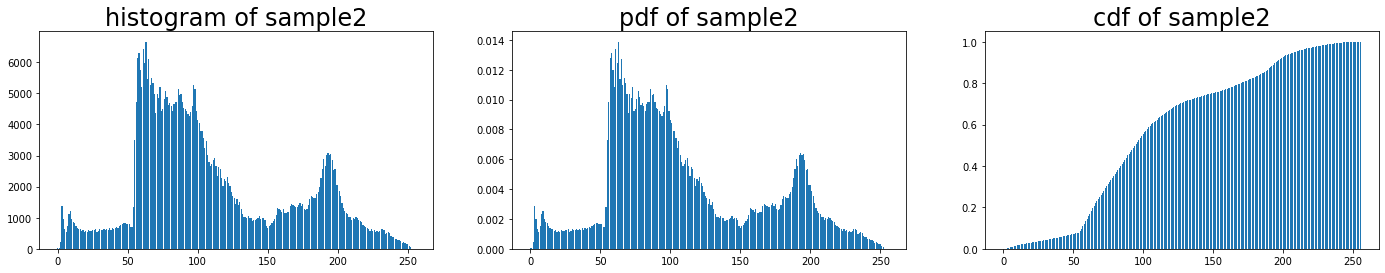

In [136]:
plt.imshow(sample2, cmap='gray',vmin=0, vmax=255)
plot_img_cdf_pdf(sample2, 'sample2')

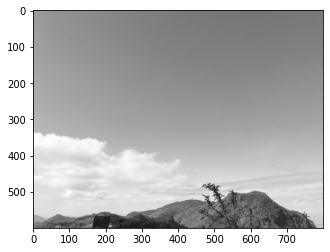

In [165]:
result9 = sample2
result9 = np.power((result9 / 255), 0.5) * 255
plt.imshow(result9, cmap='gray',vmin=0, vmax=255)

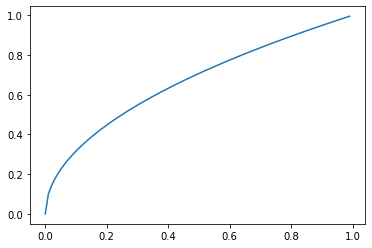

In [166]:
test = np.arange(0,1,0.01)
plt.plot(test, np.power(test,0.5))

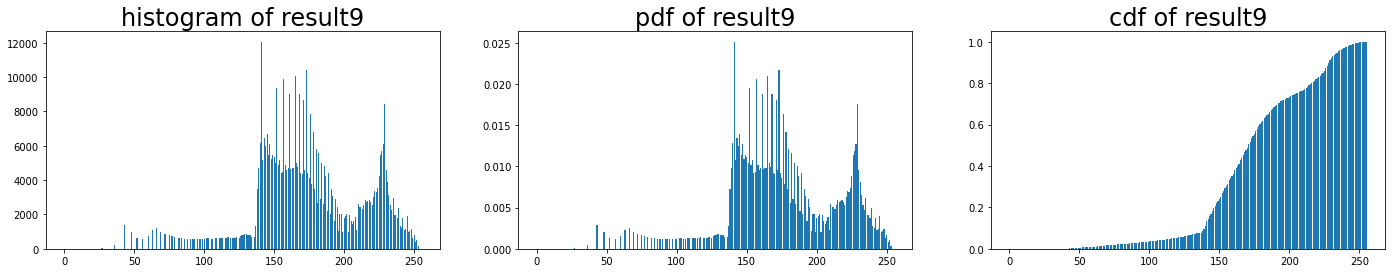

In [157]:
plot_img_cdf_pdf(result9, 'result9')

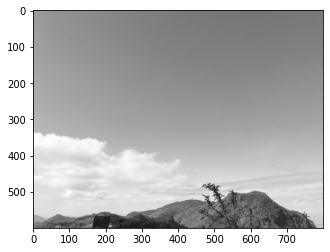

In [138]:
height, width = sample2.shape
plt.imshow(result9, cmap='gray',vmin=0, vmax=255)

### Design proper filters to remove noise on sample4.png and sample5.png. Output the clean images as result10.png and result11.png

610 810


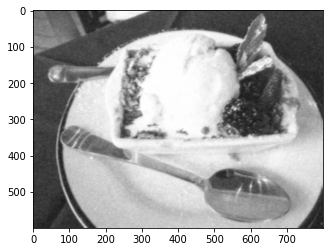

In [113]:
# sample4.jpg 的 noise 是 uniform noise，所以使用 low-pass-filter進行去噪
import math
# b = 30
# kernel = (np.array([[1, b, 1] ,[b, math.pow(b, 2), b] ,[1, b, 1]])) / math.pow(b + 2, 2)
# kernel_size = kernel.shape[0]
kernel_size = 5
kernel = np.ones((kernel_size,kernel_size))/(kernel_size*kernel_size)

# Padding
result10 = np.lib.pad(sample4, kernel.shape, 'reflect')
height, width = result10.shape
print(height, width)
gap = kernel_size // 2
for n in range(1):
    for i in range(gap, height - gap):
        for j in range(gap, width - gap):
            #將位置對應的pixel與kernel相乘後取sum
            p = (result10[i-gap:i+gap+1,j-gap:j+gap+1] * kernel).sum()
            result10[i,j] = p

# 將padding切掉
result10 = result10[kernel_size:height-kernel_size,kernel_size:width-kernel_size]

plt.imshow(result10, cmap='gray',vmin=0, vmax=255)

In [114]:
print(result10.shape)

(600, 800)


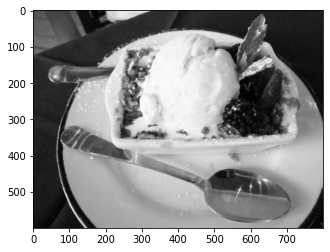

In [105]:
# sample7.jpg 的 noise 是 椒鹽雜訊，所以使用 median-filter進行去噪

kernel_size = 3
# Padding
result11 = np.lib.pad(sample5, (kernel_size,kernel_size), 'reflect')
height, width = result11.shape
gap = kernel_size // 2
for i in range(gap, height - gap):
    for j in range(gap, width - gap):
        #取kernel的中位數
        result11[i,j] = np.median(result11[i-gap:i+gap+1,j-gap:j+gap+1])
        
# 將padding切掉
result11 = result11[kernel_size:height-kernel_size,kernel_size:width-kernel_size]
plt.imshow(result11, cmap='gray',vmin=0, vmax=255)

### PSNR

In [115]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2)**2) 
    return 10 * math.log(math.pow(255, 2) / mse, 10)

print(psnr(sample3,result10))
print(psnr(sample3,result11))

27.677670250256202
35.9919614270816
